In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
import pickle
import itertools

In [3]:
MODULE_PATH = Path(os.getcwd()).parents[2]. resolve()

In [4]:
cd{MODULE_PATH}

/home/shaul/workspace/GitHub/SOTA


In [5]:
from src import filtering_correlation

In [6]:
sweep_path = "filtering_heuristic_sweeps.csv"

path_combined = 'combined_dataset.csv'
path_sts = 'sts.csv'
path_qqp = 'qqp.csv'
path_sample_qqp = 'sample_qqp.csv'

PATH_DATA = MODULE_PATH / 'data'
PATH_COMBINED = PATH_DATA / 'datasets' / path_combined
PATH_STS = PATH_DATA / 'datasets' / path_sts
PATH_SAMPLE_QQP = PATH_DATA / 'datasets' / path_sample_qqp
PATH_REPORTS = PATH_DATA / 'reports.isna()'

In [7]:
combined_path = "combined_ba.pickle"

with open(MODULE_PATH / 'data' / 'bad_annotators' / combined_path, 'rb') as f:
    combined_ba = pickle.load(f)
    
df_combined = pd.read_csv(PATH_COMBINED, index_col=0)

## Looking at the correlation on the entire dataset

In [8]:
filtering_correlation.get_baseline_correlation(df_combined)

,label
ROUGE-1,0.609100
bleu1,0.602646
ROUGE-l,0.601263
BertScore,0.592847
1-gram_overlap,0.589430
chrfScore,0.583801
L2_score,0.562731
ROUGE-2,0.531277
fasttext_cosine,0.509271
WMD,0.498807


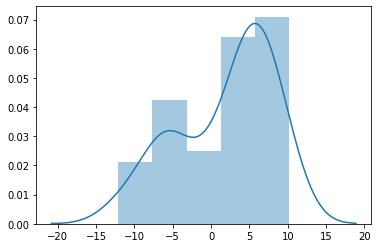

In [9]:
df_correlation = filtering_correlation.get_filtering_correlation(df_combined,combined_ba, percentage_increase=True)
sns.distplot(df_correlation.iloc[1:,:].mean(axis=1));

In [10]:
df_correlation = filtering_correlation.append_heuristic_info(df_correlation,df_combined)
df_correlation.sort_values(by=["mean_increase","percent_rows_filtered","num_heuristics"],ascending=[False,True,True])

Percentage Increase/Decrease,ROUGE-1,bleu1,ROUGE-l,BertScore,1-gram_overlap,chrfScore,L2_score,ROUGE-2,fasttext_cosine,WMD,glove_cosine,bleu,POS Dist score,mean_increase,num_heuristics,num_ba,percent_rows_filtered
"('low_std', 'high_random', 'unpopular')",10.778,10.709,10.664,10.936,10.795,10.355,10.238,10.412,7.724,9.846,8.690,10.603,11.149,10.223000,3,102,38.20
"('random_honeypot', 'low_std', 'high_random', 'unpopular')",10.778,10.709,10.664,10.936,10.795,10.355,10.238,10.412,7.724,9.846,8.690,10.603,11.149,10.223000,4,102,38.20
"('low_std', 'high_random')",10.759,10.691,10.648,10.907,10.779,10.342,10.192,10.407,7.675,9.858,8.653,10.601,11.183,10.207308,2,101,38.18
"('random_honeypot', 'low_std', 'high_random')",10.759,10.691,10.648,10.907,10.779,10.342,10.192,10.407,7.675,9.858,8.653,10.601,11.183,10.207308,3,101,38.18
"('duration', 'low_std', 'high_random', 'unpopular')",9.691,9.665,9.556,9.974,9.565,9.124,9.312,9.089,6.529,8.566,7.907,8.892,9.149,9.001462,4,127,43.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"('duration', 'random_honeypot', 'sentiment_inconsistent')",-7.531,-7.175,-7.086,-6.948,-7.323,-7.331,-7.244,-6.909,-9.442,-7.990,-8.748,-6.339,-10.143,-7.708385,3,67,33.24
"('unpopular', 'sentiment_inconsistent')",-9.946,-9.749,-9.554,-9.339,-9.649,-9.433,-9.784,-8.834,-10.718,-10.675,-10.184,-8.501,-10.573,-9.764538,2,27,19.48
"('sentiment_inconsistent',)",-9.971,-9.774,-9.578,-9.366,-9.667,-9.449,-9.829,-8.851,-10.779,-10.659,-10.233,-8.529,-10.536,-9.786231,1,25,19.45
"('duration', 'unpopular', 'sentiment_inconsistent')",-12.207,-12.013,-11.836,-11.471,-12.048,-11.771,-11.813,-11.484,-12.820,-12.690,-12.028,-11.472,-13.873,-12.117385,3,56,23.91


In [11]:
top_heuristic = list(eval(df_correlation.sort_values(by=["mean_increase","percent_rows_filtered","num_heuristics"],ascending=[False,True,True]).index[0]))
print(top_heuristic)
filtering_correlation.get_heuristic_scores(df_combined,top_heuristic)

['low_std', 'high_random', 'unpopular']


,label
ROUGE-1,0.674746
bleu1,0.667181
ROUGE-l,0.665381
BertScore,0.657682
1-gram_overlap,0.653062
chrfScore,0.644252
L2_score,0.620344
ROUGE-2,0.586592
fasttext_cosine,0.548608
WMD,0.547921


## Diving the dataset into random and non-random

In [10]:
df_nonrandom = df_combined[df_combined.random == 0]
df_random = df_combined[df_combined.random == 1]

### The non-random group

In [11]:
filtering_correlation.get_baseline_correlation(df_nonrandom)

,label
bleu1,0.299843
ROUGE-1,0.297830
1-gram_overlap,0.294672
L2_score,0.294227
ROUGE-l,0.292721
BertScore,0.281925
chrfScore,0.279405
WMD,0.271615
ROUGE-2,0.253510
fasttext_cosine,0.222947


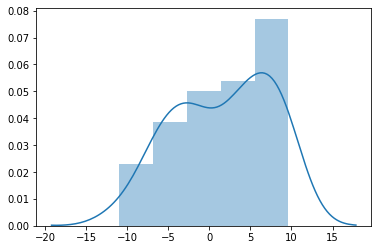

In [12]:
df_correlation_nonr = filtering_correlation.get_filtering_correlation(df_nonrandom,combined_ba, percentage_increase=True)
sns.distplot(df_correlation_nonr.iloc[1:,:].mean(axis=1));

In [13]:
df_correlation_nonr = filtering_correlation.append_heuristic_info(df_correlation_nonr,df_nonrandom)
df_correlation_nonr.sort_values(by=["mean_increase","percent_rows_filtered","num_heuristics"],ascending=[False,True,True])

Percentage Increase/Decrease,bleu1,ROUGE-1,1-gram_overlap,L2_score,ROUGE-l,BertScore,chrfScore,WMD,ROUGE-2,fasttext_cosine,bleu,glove_cosine,POS Dist score,mean_increase,num_heuristics,num_ba,percent_rows_filtered
"('low_std', 'high_random', 'sentiment_inconsistent')",8.964,8.552,9.232,8.894,9.622,10.842,8.789,10.370,9.816,5.843,10.711,9.893,13.553,9.621615,3,122,53.13
"('random_honeypot', 'low_std', 'high_random', 'sentiment_inconsistent')",8.964,8.552,9.232,8.894,9.622,10.842,8.789,10.370,9.816,5.843,10.711,9.893,13.553,9.621615,4,122,53.13
"('low_std', 'high_random', 'unpopular', 'sentiment_inconsistent')",8.960,8.541,9.219,8.885,9.607,10.829,8.771,10.366,9.798,5.821,10.689,9.876,13.516,9.606000,4,123,53.13
"('random_honeypot', 'low_std', 'high_random', 'unpopular', 'sentiment_inconsistent')",8.960,8.541,9.219,8.885,9.607,10.829,8.771,10.366,9.798,5.821,10.689,9.876,13.516,9.606000,5,123,53.13
"('duration', 'low_std', 'high_random', 'sentiment_inconsistent')",9.003,8.306,8.542,9.596,9.467,12.245,8.400,10.287,8.774,5.455,9.568,13.565,10.183,9.491615,4,144,56.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"('sentiment_inconsistent',)",-6.876,-7.310,-7.375,-8.734,-5.907,-5.069,-5.658,-7.673,-5.270,-11.599,-6.196,-10.246,-4.244,-7.089000,1,25,19.62
"('duration', 'unpopular')",-6.867,-7.189,-7.552,-5.586,-7.287,-5.969,-6.756,-6.048,-7.899,-6.553,-8.500,-4.211,-11.779,-7.092000,2,34,6.49
"('duration',)",-6.888,-7.209,-7.557,-5.613,-7.315,-5.999,-6.776,-5.993,-7.928,-6.599,-8.538,-4.257,-11.886,-7.119846,1,32,6.47
"('duration', 'unpopular', 'sentiment_inconsistent')",-10.517,-11.292,-11.702,-11.558,-9.868,-7.572,-9.590,-11.000,-10.362,-15.683,-11.631,-11.674,-9.907,-10.950462,3,56,24.47


In [14]:
top_heuristic = list(eval(df_correlation_nonr.sort_values(by=["mean_increase","percent_rows_filtered","num_heuristics"],ascending=[False,True,True]).index[0]))
print(top_heuristic)
filtering_correlation.get_heuristic_scores(df_nonrandom,top_heuristic)

['low_std', 'high_random', 'sentiment_inconsistent']


,label
bleu1,0.326722
ROUGE-1,0.323299
1-gram_overlap,0.321876
ROUGE-l,0.320887
L2_score,0.320396
BertScore,0.312491
chrfScore,0.303963
WMD,0.299783
ROUGE-2,0.278394
bleu,0.246353


### The random pairs

In [16]:
filtering_correlation.get_baseline_correlation(df_random)

,label
fasttext_cosine,0.119093
chrfScore,0.096305
glove_cosine,0.091380
WMD,0.090213
L2_score,0.089046
bleu1,0.051464
bleu,0.051283
ROUGE-1,0.049618
1-gram_overlap,0.049025
ROUGE-l,0.041517


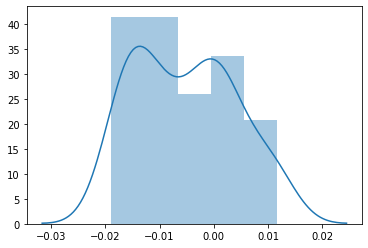

In [17]:
df_correlation_r = filtering_correlation.get_filtering_correlation(df_random,combined_ba, percentage_increase=False)
sns.distplot(df_correlation_r.iloc[1:,:].mean(axis=1));

In [18]:
df_correlation_r = filtering_correlation.append_heuristic_info(df_correlation_r,df_random)
df_correlation_r.sort_values(by=["mean_increase","percent_rows_filtered","num_heuristics"],ascending=[False,True,True])

Total Increase/Decrease,fasttext_cosine,chrfScore,glove_cosine,WMD,L2_score,bleu1,bleu,ROUGE-1,1-gram_overlap,ROUGE-l,ROUGE-2,POS Dist score,BertScore,mean_increase,num_heuristics,num_ba,percent_rows_filtered
"('low_std', 'high_random')",-0.031612,0.019991,-0.006138,0.001156,0.010424,0.027303,0.015922,0.026780,0.024472,0.025162,0.013871,0.003548,0.021850,0.011748,2,101,37.93
"('random_honeypot', 'low_std', 'high_random')",-0.031612,0.019991,-0.006138,0.001156,0.010424,0.027303,0.015922,0.026780,0.024472,0.025162,0.013871,0.003548,0.021850,0.011748,3,101,37.93
"('low_std', 'high_random', 'unpopular')",-0.030670,0.019373,-0.005606,0.000261,0.011609,0.026990,0.015989,0.026584,0.024225,0.024770,0.012117,0.002983,0.022427,0.011619,3,102,37.95
"('random_honeypot', 'low_std', 'high_random', 'unpopular')",-0.030670,0.019373,-0.005606,0.000261,0.011609,0.026990,0.015989,0.026584,0.024225,0.024770,0.012117,0.002983,0.022427,0.011619,4,102,37.95
"('duration', 'low_std', 'high_random')",-0.036283,0.014584,-0.011187,-0.001460,0.006727,0.025554,0.015175,0.025013,0.023559,0.023803,0.015070,-0.002412,0.018690,0.008987,3,126,42.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"('duration', 'random_honeypot', 'sentiment_inconsistent')",-0.041496,-0.038385,-0.028044,-0.037390,-0.018107,-0.014797,-0.008055,-0.013852,-0.012109,-0.006373,0.003616,0.003799,-0.000073,-0.016251,3,67,32.11
"('unpopular', 'sentiment_inconsistent')",-0.028004,-0.034538,-0.017413,-0.035814,-0.017048,-0.023377,-0.009573,-0.022683,-0.021089,-0.016293,-0.000474,-0.003657,0.000673,-0.017638,2,27,19.33
"('sentiment_inconsistent',)",-0.028647,-0.034346,-0.017750,-0.035600,-0.017605,-0.023464,-0.009573,-0.022826,-0.021192,-0.016360,0.000164,-0.003105,0.000552,-0.017673,1,25,19.29
"('duration', 'unpopular', 'sentiment_inconsistent')",-0.028274,-0.039458,-0.019321,-0.035141,-0.017475,-0.025909,-0.009260,-0.023880,-0.022640,-0.017633,-0.003470,0.001868,-0.003742,-0.018795,3,56,23.35


In [19]:
top_heuristic = list(eval(df_correlation_r.sort_values(by=["mean_increase","percent_rows_filtered","num_heuristics"],ascending=[False,True,True]).index[0]))
print(top_heuristic)
filtering_correlation.get_heuristic_scores(df_random,top_heuristic)

['low_std', 'high_random']


,label
chrfScore,0.116296
L2_score,0.099471
WMD,0.091368
fasttext_cosine,0.087480
glove_cosine,0.085243
bleu1,0.078767
ROUGE-1,0.076397
1-gram_overlap,0.073497
bleu,0.067205
ROUGE-l,0.066679


## Divide the dataset into subgroups, see how correlation is for bad_annotators / Radical / Centrist Groups

###  Bad annotators


In [20]:
ba = combined_ba['ba_combined']
df_ba = df_combined[df_combined.annotator.isin(ba)]

In [21]:
filtering_correlation.get_baseline_correlation(df_ba)

,label
ROUGE-1,0.343523
bleu1,0.339385
ROUGE-l,0.336641
1-gram_overlap,0.331485
chrfScore,0.329938
BertScore,0.329021
L2_score,0.316808
fasttext_cosine,0.301842
ROUGE-2,0.299641
WMD,0.281964


### Radical annotators

In [56]:
df_classify_annotator = df_combined.copy()
df_classify_annotator = df_classify_annotator[df_classify_annotator.label != 3]
min_five_posters = list(pd.Series(df_combined.groupby('annotator').size()).mask(lambda x: x < 5).dropna().index)
df_classify_annotator = df_classify_annotator[df_classify_annotator['annotator'].isin(min_five_posters)]

In [57]:
df_classify_annotator['radical'] = [1 if ((x == 1) or (x ==5)) else 0 for x in df_classify_annotator.label]
percent_radical = df_classify_annotator.groupby('annotator')['radical'].mean()
variance_in_labels = df_classify_annotator.groupby('annotator')['label'].std()

In [58]:
radical_labelers = (variance_in_labels > 1) & (percent_radical > 0.5)
radical_labelers = list(radical_labelers[radical_labelers].index)
print("Number of radical labelers: ", len(radical_labelers))
print("Number of rows with radical labelers: ", df_combined[df_combined.annotator.isin(radical_labelers)].shape[0])

Number of radical labelers:  169
Number of rows with radical labelers:  15408


In [59]:
df_radical = df_combined[df_combined.annotator.isin(radical_labelers)]

In [60]:
filtering_correlation.get_baseline_correlation(df_radical)

,label
ROUGE-1,0.699787
bleu1,0.690283
ROUGE-l,0.687467
BertScore,0.684576
1-gram_overlap,0.675786
chrfScore,0.664713
L2_score,0.644167
ROUGE-2,0.607596
fasttext_cosine,0.567312
WMD,0.566018


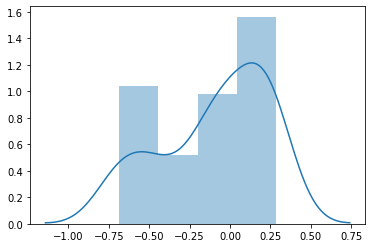

In [61]:
df_correlation_rad = filtering_correlation.get_filtering_correlation(df_radical,combined_ba, percentage_increase=True)
sns.distplot(df_correlation_rad.iloc[1:,:].mean(axis=1));

In [62]:
df_correlation_rad = filtering_correlation.append_heuristic_info(df_correlation_rad,df_radical)
df_correlation_rad.sort_values(by=["mean_increase","percent_rows_filtered","num_heuristics"],ascending=[False,True,True])

Percentage Increase/Decrease,ROUGE-1,bleu1,ROUGE-l,BertScore,1-gram_overlap,chrfScore,L2_score,ROUGE-2,fasttext_cosine,WMD,glove_cosine,bleu,POS Dist score,mean_increase,num_heuristics,num_ba,percent_rows_filtered
"('high_random', 'sentiment_inconsistent')",0.173,0.482,0.503,0.253,0.360,0.343,0.284,1.08,-0.345,-0.580,-0.014,1.579,-0.392,0.286615,2,44,27.16
"('random_honeypot', 'high_random', 'sentiment_inconsistent')",0.173,0.482,0.503,0.253,0.360,0.343,0.284,1.08,-0.345,-0.580,-0.014,1.579,-0.392,0.286615,3,44,27.16
"('low_std', 'high_random', 'sentiment_inconsistent')",0.173,0.482,0.503,0.253,0.360,0.343,0.284,1.08,-0.345,-0.580,-0.014,1.579,-0.392,0.286615,3,122,27.16
"('high_random', 'unpopular', 'sentiment_inconsistent')",0.173,0.482,0.503,0.253,0.360,0.343,0.284,1.08,-0.345,-0.580,-0.014,1.579,-0.392,0.286615,3,46,27.16
"('random_honeypot', 'low_std', 'high_random', 'sentiment_inconsistent')",0.173,0.482,0.503,0.253,0.360,0.343,0.284,1.08,-0.345,-0.580,-0.014,1.579,-0.392,0.286615,4,122,27.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"('duration', 'unpopular')",-0.454,-0.428,-0.489,-0.404,-0.528,-0.712,-0.581,-0.70,-0.692,-0.968,-0.474,-1.107,-1.414,-0.688538,2,34,7.84
"('duration', 'random_honeypot', 'low_std')",-0.454,-0.428,-0.489,-0.404,-0.528,-0.712,-0.581,-0.70,-0.692,-0.968,-0.474,-1.107,-1.414,-0.688538,3,121,7.84
"('duration', 'random_honeypot', 'unpopular')",-0.454,-0.428,-0.489,-0.404,-0.528,-0.712,-0.581,-0.70,-0.692,-0.968,-0.474,-1.107,-1.414,-0.688538,3,49,7.84
"('duration', 'low_std', 'unpopular')",-0.454,-0.428,-0.489,-0.404,-0.528,-0.712,-0.581,-0.70,-0.692,-0.968,-0.474,-1.107,-1.414,-0.688538,3,122,7.84


In [63]:
top_heuristic = list(eval(df_correlation_rad.sort_values(by=["mean_increase","percent_rows_filtered","num_heuristics"],ascending=[False,True,True]).index[0]))
print(top_heuristic)
filtering_correlation.get_heuristic_scores(df_radical,top_heuristic)

['high_random', 'sentiment_inconsistent']


,label
ROUGE-1,0.701000
bleu1,0.693611
ROUGE-l,0.690929
BertScore,0.686311
1-gram_overlap,0.678221
chrfScore,0.666991
L2_score,0.645996
ROUGE-2,0.614159
fasttext_cosine,0.565357
WMD,0.562734


### Centrist annotators

In [64]:
centrist_labelers = (variance_in_labels > 1) & (percent_radical < 0.5)
centrist_labelers = list(centrist_labelers[centrist_labelers].index)
print("Number of centrist labelers: ", len(centrist_labelers))
print("Number of rows with centrist labelers: ", df_combined[df_combined.annotator.isin(centrist_labelers)].shape[0])

Number of centrist labelers:  75
Number of rows with centrist labelers:  13195


In [65]:
df_centrist = df_combined[df_combined.annotator.isin(centrist_labelers)]

In [66]:
filtering_correlation.get_baseline_correlation(df_centrist)

,label
ROUGE-l,0.284277
bleu1,0.282320
BertScore,0.280540
ROUGE-1,0.277321
1-gram_overlap,0.275464
chrfScore,0.275420
ROUGE-2,0.255775
L2_score,0.249039
WMD,0.210703
fasttext_cosine,0.208547


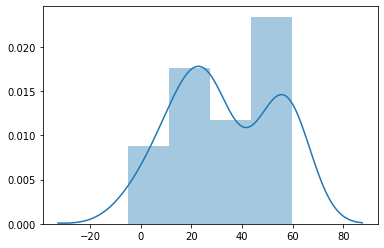

In [67]:
df_correlation_cen = filtering_correlation.get_filtering_correlation(df_centrist,combined_ba, percentage_increase=True)
sns.distplot(df_correlation_cen.iloc[1:,:].mean(axis=1));

In [68]:
df_correlation_cen = filtering_correlation.append_heuristic_info(df_correlation_cen,df_centrist)
df_correlation_cen.sort_values(by=["mean_increase","percent_rows_filtered","num_heuristics"],ascending=[False,True,True])

Percentage Increase/Decrease,ROUGE-l,bleu1,BertScore,ROUGE-1,1-gram_overlap,chrfScore,ROUGE-2,L2_score,WMD,fasttext_cosine,bleu,glove_cosine,POS Dist score,mean_increase,num_heuristics,num_ba,percent_rows_filtered
"('low_std', 'high_random', 'sentiment_inconsistent')",61.937000,61.31900,63.72100,62.792000,62.035000,59.84200,58.953000,58.374000,54.717000,52.204000,55.442000,56.83700,70.291000,59.881846,3,122,61.78
"('random_honeypot', 'low_std', 'high_random', 'sentiment_inconsistent')",61.937000,61.31900,63.72100,62.792000,62.035000,59.84200,58.953000,58.374000,54.717000,52.204000,55.442000,56.83700,70.291000,59.881846,4,122,61.78
"('low_std', 'high_random', 'unpopular', 'sentiment_inconsistent')",61.937000,61.31900,63.72100,62.792000,62.035000,59.84200,58.953000,58.374000,54.717000,52.204000,55.442000,56.83700,70.291000,59.881846,4,123,61.78
"('random_honeypot', 'low_std', 'high_random', 'unpopular', 'sentiment_inconsistent')",61.937000,61.31900,63.72100,62.792000,62.035000,59.84200,58.953000,58.374000,54.717000,52.204000,55.442000,56.83700,70.291000,59.881846,5,123,61.78
"('duration', 'low_std', 'high_random', 'sentiment_inconsistent')",61.542000,60.74800,63.96400,62.168000,61.692000,60.08000,58.914000,56.999000,55.218000,49.962000,55.103000,55.85800,67.283000,59.194692,4,144,65.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"('duration', 'unpopular', 'sentiment_inconsistent')",4.331000,4.67200,5.57100,4.425000,4.950000,4.94400,4.773000,3.785000,4.013000,1.277000,6.018000,1.82700,-0.327000,3.866077,3,56,26.75
label,0.284277,0.28232,0.28054,0.277321,0.275464,0.27542,0.255775,0.249039,0.210703,0.208547,0.205087,0.18933,0.161584,0.000000,0,0,0.00
"('unpopular',)",0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1,2,0.00
"('duration',)",-5.038000,-4.87700,-5.13100,-5.020000,-5.066000,-4.53800,-5.265000,-5.021000,-3.851000,-4.658000,-5.484000,-5.24700,-7.607000,-5.138692,1,32,5.25


In [69]:
top_heuristic = list(eval(df_correlation_cen.sort_values(by=["mean_increase","percent_rows_filtered","num_heuristics"],ascending=[False,True,True]).index[0]))
print(top_heuristic)
filtering_correlation.get_heuristic_scores(df_centrist,top_heuristic)

['low_std', 'high_random', 'sentiment_inconsistent']


,label
ROUGE-l,0.460349
BertScore,0.459303
bleu1,0.455437
ROUGE-1,0.451457
1-gram_overlap,0.446350
chrfScore,0.440238
ROUGE-2,0.406561
L2_score,0.394411
WMD,0.325993
bleu,0.318791


## Test correlation on random annotators

In [34]:
# I am going to randomly remove 20% of the annotator
ten_percent = len(list(df_combined.annotator.unique())) // 20
np.random.seed(42)
random_annotators = list(np.random.choice(list(df_combined.annotator.unique()),ten_percent,replace=False))

In [35]:
df_random_filtering = df_combined[~df_combined.annotator.isin(random_annotators)]

In [38]:
filtering_correlation.get_baseline_correlation(df_random_filtering) - filtering_correlation.get_baseline_correlation(df_combined)

,label
ROUGE-1,-0.000946
bleu1,-0.001264
ROUGE-l,-0.001435
BertScore,0.000324
1-gram_overlap,-0.000569
chrfScore,0.000821
L2_score,-0.000185
ROUGE-2,-0.000631
fasttext_cosine,0.000087
WMD,0.000218


When we remove a random number of annotators, nothing really changes. This is good news!

In [92]:
avg_corr = {}
for name, group in df_combined.groupby('dataset'):
    corr = filtering_correlation.get_filtering_correlation(group,combined_ba, percentage_increase=True)
    corr = filtering_correlation.append_heuristic_info(corr,group)
    top_corr = corr['mean_increase'].sort_values(ascending=False)[0]
    avg_corr[name] = top_corr

In [93]:
avg_corr

{'bible_human': 11.650538461538462,
 'bible_random_human': 246.88346153846152,
 'gyafc_formal_human': 18.149153846153844,
 'gyafc_formal_random_human': 148.88453846153845,
 'gyafc_informal_human': 6.919769230769232,
 'gyafc_informal_random_human': 191.13923076923078,
 'gyafc_rewrites_human': 8.060076923076924,
 'gyafc_rewrites_random_human': 437.12884615384615,
 'paralex_human': 14.096923076923078,
 'paralex_random_human': 129.5222307692308,
 'paraphrase_human': 2.690384615384615,
 'yelp_human': 20.124384615384617,
 'yelp_random_human': 139.37676923076924}

In [89]:
df_example = df_combined[df_combined.dataset == 'gyafc_rewrites_random_human']
corr = filtering_correlation.get_filtering_correlation(df_example,combined_ba, percentage_increase=True)
corr = filtering_correlation.append_heuristic_info(corr,df_example)

In [90]:
filtering_correlation.get_baseline_correlation(df_example).mean()

label    0.021518
dtype: float64

In [91]:
top_heuristic = list(eval(corr.sort_values(by=["mean_increase","percent_rows_filtered","num_heuristics"],ascending=[False,True,True]).index[0]))
print(top_heuristic)
filtering_correlation.get_heuristic_scores(df_example,top_heuristic).mean()

['duration', 'low_std', 'sentiment_inconsistent']


label    0.040801
dtype: float64